#Planeación de rutas para la exploración en Marte

Diego Armando Mijares A01722421

Renata Garfias Núñez A01369860

Máximo Caballero Vargas A01571607

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Planeación de rutas para la exploración en Marte
Diego Armando Mijares A01722421

Renata Garfias Núñez A01369860

Máximo Caballero vargas A01571607

# Generar matriz de mapa, visualizarlo, y voltear eje vertical

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Height map pre-processing
#------------------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------------------
#   Imports
#------------------------------------------------------------------------------------------------------------------

import copy
import numpy as np
from skimage.transform import downscale_local_mean

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

import plotly.graph_objects as px

import numpy as np

#------------------------------------------------------------------------------------------------------------------
#   File names
#------------------------------------------------------------------------------------------------------------------
input_file = "/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/mars_map.IMG"
output_file = "mars_map.npy"

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Load map data
#------------------------------------------------------------------------------------------------------------------

data_file = open(input_file, "rb")

endHeader = False;
while not endHeader:
    line = data_file.readline().rstrip().lower()

    sep_line = line.split(b'=')

    if len(sep_line) == 2:
        itemName = sep_line[0].rstrip().lstrip()
        itemValue = sep_line[1].rstrip().lstrip()

        if itemName == b'valid_maximum':
            maxV = float(itemValue)
        elif itemName == b'valid_minimum':
            minV = float(itemValue)
        elif itemName == b'lines':
            n_rows = int(itemValue)
        elif itemName == b'line_samples':
            n_columns = int(itemValue)
        elif itemName == b'map_scale':
            scale_str = itemValue.split()
            if len(scale_str) > 1:
                scale = float(scale_str[0])

    elif line == b'end':
        endHeader = True
        char = 0
        while char == 0 or char == 32:
            char = data_file.read(1)[0]
        pos = data_file.seek(-1, 1)

image_size = n_rows*n_columns
data = data_file.read(4*image_size)

image_data = np.frombuffer(data, dtype=np.dtype('f'))
image_data = image_data.reshape((n_rows, n_columns))
image_data = np.array(image_data)
image_data = image_data.astype('float64')

image_data = image_data - minV;
image_data[image_data < -10000] = -1;

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Subsampling
#------------------------------------------------------------------------------------------------------------------
sub_rate = round(10/scale)

image_data = downscale_local_mean(image_data, (sub_rate, sub_rate))
image_data[image_data<0] = -1

print('Sub-sampling:', sub_rate)

new_scale = scale*sub_rate
print('New scale:', new_scale, 'meters/pixel')

Sub-sampling: 10
New scale: 10.017330185711 meters/pixel


In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Save map
#------------------------------------------------------------------------------------------------------------------
#np.save(output_file, image_data)

In [ ]:
# AQUI HAZE DISCONNECT, SI CORRE, PERO NO MUESTRA LA FIGURA
# CORRER LOCAL, DA URL INTERACTIVO
#------------------------------------------------------------------------------------------------------------------
#   Show 3D surface
#------------------------------------------------------------------------------------------------------------------

x = new_scale*np.arange(image_data.shape[1])
y = new_scale*np.arange(image_data.shape[0])
X, Y = np.meshgrid(x, y)

fig = px.Figure(data = px.Surface(x=X, y=Y, z=np.flipud(image_data), colorscale='hot', cmin = 0,
                           lighting = dict(ambient = 0.0, diffuse = 0.8, fresnel = 0.02, roughness = 0.4, specular = 0.2),
                           lightposition=dict(x=0, y=n_rows/2, z=2*maxV)),

                layout = px.Layout(scene_aspectmode='manual',
                                   scene_aspectratio=dict(x=1, y=n_rows/n_columns, z=max((maxV-minV)/x.max(), 0.2)),
                                   scene_zaxis_range = [0,maxV-minV])
                )

fig.show()

Localmente te permite interactuar con un mapa así, lo puedes rotar, poner tu cursor en cualquier lugar y te da las coordenadas, etc:



 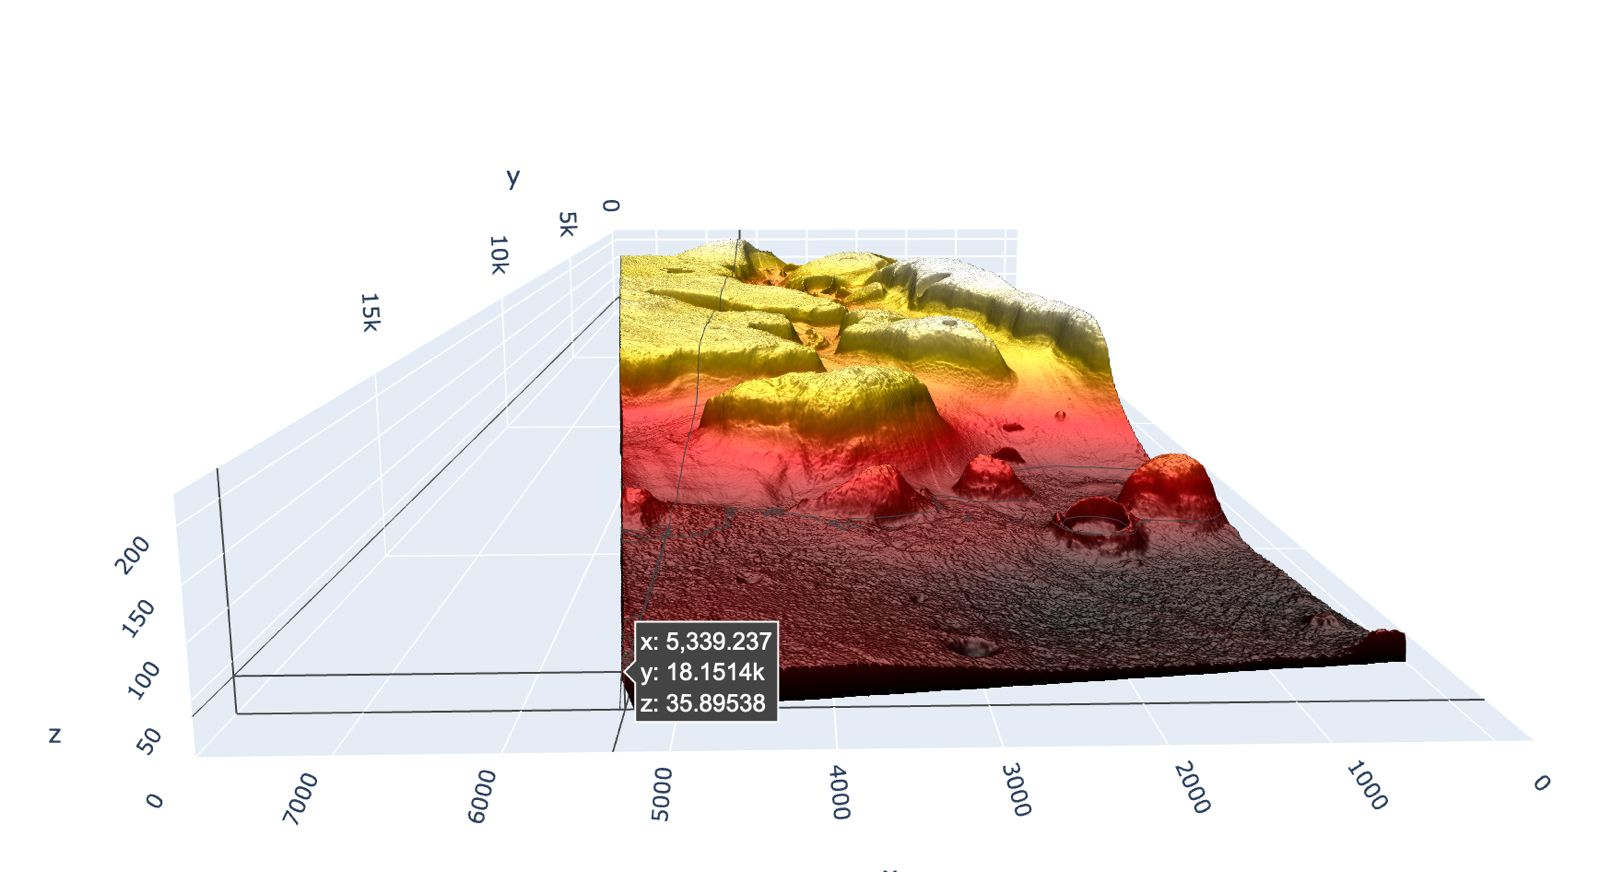



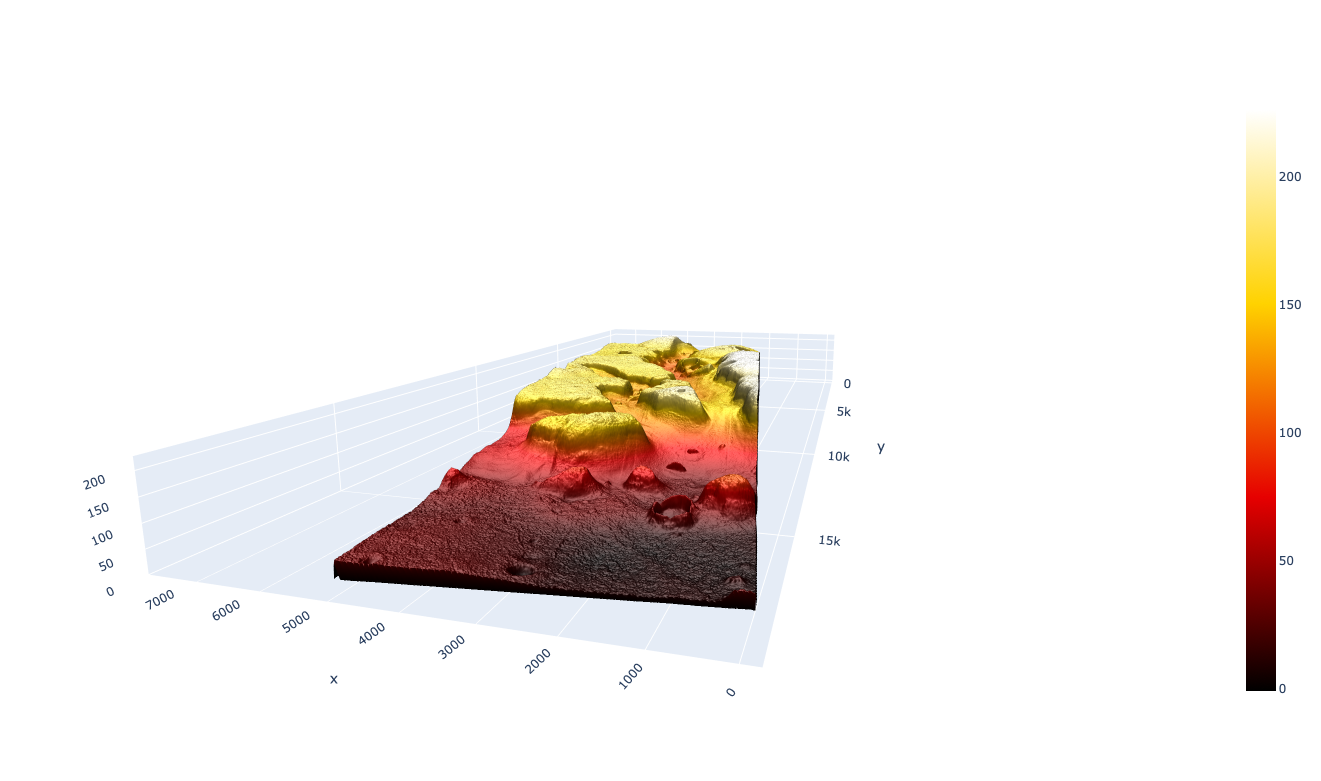

<ipython-input-27-6ba467421abf>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



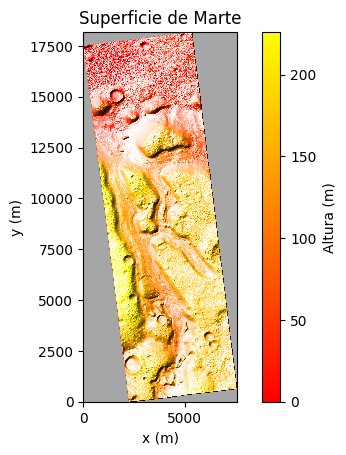

In [ ]:
#------------------------------------------------------------------------------------------------------------------
#   Show surface image
#------------------------------------------------------------------------------------------------------------------

cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')

ls = LightSource(315, 45)
rgb = ls.shade(image_data, cmap=cmap, vmin = 0, vmax = image_data.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = image_data.max(),
                extent =[0, scale*n_columns, 0, scale*n_rows],
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

In [ ]:
# Cargar nuevo mapa
mars_map = np.load('/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/mars_map.npy')
nr, nc = mars_map.shape

In [ ]:
# Trasnformar a R y C
escala_instruccion = 10.0174
nr_instruccion = 1814
r = nr_instruccion - np.round(y / escala_instruccion)
c = np.round(x / escala_instruccion)

print('r calculado:', r)
print('c calculado:', c)


# Funciones, Clases y Variables para Prueba de Algoritmos de Búsqueda

In [ ]:
!pip install simpleai

from simpleai.search import SearchProblem, depth_first, breadth_first, uniform_cost, greedy, astar
from simpleai.search.viewers import BaseViewer, ConsoleViewer, WebViewer

import time
import random
import math
import numpy as np

In [ ]:
#Variables

escala = 10.0174  # escala para las coordenadas
mars_map = np.load('/content/drive/MyDrive/Reto Agentes Inteligentes/Cargables para código/mars_map.npy')  # Carga un mapa de Marte desde un archivo
nr, nc = mars_map.shape  # Obtiene las dimensiones del mapa de Marte
x = np.round(escala*np.arange(mars_map.shape[1]))  # Define un array de coordenadas x del mapa original
y = np.round(escala*np.arange(mars_map.shape[0]))  # Define un array de coordenadas y del mapa original
paso = 1  # Define un paso para los movimientos

# Inicializamos el último estado exitoso y su costo
last_successful_state = None
last_successful_cost = 0

In [ ]:
# Función para obtener la altura en una posición dada en el mapa, sólo recibe coordenada de matriz
def height(c,r):
    return mars_map[r][c]

In [ ]:
# Función para traducir coordenadas de posición en coordenadas de matriz
def traductorMatriz(posicion):
    r = nr - round(posicion[1]/escala)
    c = round(posicion[0]/escala)
    return c,r

In [ ]:
# Clase que define el problema de búsqueda
class Camino(SearchProblem):
    def __init__(self, posicion, destino, max_altura):
        # Traduce las coordenadas de origen a la matriz del mapa de Marte
        r = round(nr-(posicion[1]//escala))
        c = round(posicion[0]//escala)

        # Traduce las coordenadas del destino a la matriz del mapa de Marte y obtiene su altura
        Meta_coordenadas = traductorMatriz(destino)
        #Se define el estado inicial y el estado meta
        Meta = (Meta_coordenadas[0], Meta_coordenadas[1], height(Meta_coordenadas[0], Meta_coordenadas[1]))
        initial_state = (c, r, height(c,r))
        super().__init__(initial_state=initial_state)
        #Se define que tanto puede cambiar la altura entre cada posición
        self.max_altura = max_altura
        self.goal = Meta


    # Función para verificar si el estado actual es la meta
    def is_goal(self, state):
        return state == self.goal


    # Función para obtener las acciones posibles desde un estado
    def actions(self, state):
        # Lista de movimientos posibles: arriba, abajo, izquierda, derecha y diagonales
        actions = [(0,-1),(0,1),(-1,0),(1,0),(-1,-1),(-1,1),(1,-1),(1,1)]
        # Incializamos una lista de las acciones que cumplen las condiciones establecidas
        possible_actions = []
        # Verifica si los movimientos son válidos dentro del mapa y no exceden la altura máxima
        for i in range(8):
            if 0 < state[0]+actions[i][0] < 756 and 0 < state[1]+actions[i][1] < 1814 and abs(height(state[0]+actions[i][0],state[1]+actions[i][1]) - height(state[0], state[1])) <= self.max_altura:
                possible_actions.append(actions[i])

        return possible_actions

    # Función para obtener el resultado de una acción en un estado
    def result(self, state, action):
      global last_successful_state, last_successful_cost #esto nos sirve en caso de que no llegue a la meta, poder reportar la coordenada final
      (c, r, altura) = state
      new_c = action[0] + c
      new_r = action[1] + r
      new_altura = height(new_c, new_r)
      new_state = new_c, new_r, new_altura
      last_successful_state = new_state
      last_successful_cost += self.cost(state, action, new_state)
      return new_state


    # Función para obtener el costo de una acción
    def cost(self, state, action, state2):
        costo_x = 0
        costo_y = 0

        # Se incrementa el costo según la dirección del movimiento
        if action[0] != 0:
            costo_x = 1
        if action[1] != 0:
            costo_y = 1
        costo = costo_x + costo_y

        return costo


    # Función heurística para la estimación de costos
    def heuristic(self, state):
        c, r , altura = state
        # Calcula la distancia euclidiana entre el estado actual y la meta
        distance = math.sqrt(((c-self.goal[0])**2) + ((r-self.goal[1])**2))

        return distance

In [ ]:
# Definición de puntos de origen, destino y límite de altura
# x = 2850 y = 6400 hasta el punto x = 3150 y = 6800
# Menor a 0.25 metros, se debe poder modificar
origen = (2850, 6400)
destino = (3150, 6800)
limite_altura = 0.25

# Creación de instancia del problema y ejecución de algoritmos de búsqueda
Estado_I = Camino(origen, destino, limite_altura)

In [ ]:
# resultado de la búsqueda
def display(result):
    global last_successful_state, last_successful_cost
    if result is None:
        print("No se pudo llegar a la meta.")
        print("Última posición exitosa: ", last_successful_state)
        print("Costo para llegar a la última posición exitosa: ", last_successful_cost)
    else:
        print("Costo & Distancia Recorrida: ", result.cost)
        print("Punto de origen: ", origen)

        # Posición final del agente en coordenadas de la matriz (redondeadas)
        final_c, final_r, final_altura = map(round, result.state)
        print('Posición final del agente en coordenadas de la matriz: ', (final_c, final_r, final_altura))

        # Posición final del agente en coordenadas originales
        final_x = round(final_c * escala)
        final_y = round((nr - final_r) * escala)
        final_altura = round(final_altura)
        print('Posición final del agente en coordenadas originales: ', (final_x, final_y, final_altura))


# A Star

In [ ]:
# Búsqueda A*
Problema_I = astar(Estado_I, graph_search=True)
print()
print('>> Búsqueda A* <<')

# Display coordenada original, costo, coordenada final
display(Problema_I)


>> Búsqueda A* <<
Costo & Distancia Recorrida:  383
Punto de origen:  (2850, 6400)
Posición final del agente en coordenadas de la matriz:  (314, 1136, 128)
Posición final del agente en coordenadas originales:  (3145, 6802, 128)


# Breadth First

In [ ]:
# Búsqueda Breadth-First
Problema_II = breadth_first(Estado_I, graph_search=True)
print()
print('>> Búsqueda Breadth <<')

# Display coordenada original, costo, coordenada final
display(Problema_II)



>> Búsqueda Breadth <<
Costo & Distancia Recorrida:  397
Punto de origen:  (2850, 6400)
Posición final del agente en coordenadas de la matriz:  (314, 1136, 128)
Posición final del agente en coordenadas originales:  (3145, 6802, 128)


# Uniform Cost

In [ ]:
# Búsqueda Uniform Cost
Problema_III = uniform_cost(Estado_I, graph_search=True)
print()
print('>> Búsqueda Uniform Cost <<')

# Display coordenada original, costo, coordenada final
display(Problema_III)


>> Búsqueda Uniform Cost <<
Costo & Distancia Recorrida:  383
Punto de origen:  (2850, 6400)
Posición final del agente en coordenadas de la matriz:  (314, 1136, 128)
Posición final del agente en coordenadas originales:  (3145, 6802, 128)


#Greedy

In [ ]:
# Búsqueda Greedy
Problema_IV = greedy(Estado_I, graph_search=True)
print()
print('>> Búsqueda Greedy* <<')

# Display coordenada original, costo, coordenada final
display(Problema_IV)



>> Búsqueda Greedy* <<
Costo & Distancia Recorrida:  515
Punto de origen:  (2850, 6400)
Posición final del agente en coordenadas de la matriz:  (314, 1136, 128)
Posición final del agente en coordenadas originales:  (3145, 6802, 128)


#Análisis de rendimiento de los previos cuatro algoritmos:

#¿Qué algoritmos lograron encontrar una ruta válida?

Se puede observar como todos los algoritmos encontraron una ruta valida. En esta ocasión, eso incluye A Star, Codiciosa, Anchura, y Costo Uniforme. No obstante, no todos tuvieron la misma eficiencia. Se puede observar que la menos eficiente fue Greedy, con un costo y distancia recorrida de 515 para llegar a la meta. Después, vemos que la búsqueda en anchura tuvo una eficiencia de 397, lo que se acerca bastante al mejor resultado, compartido por A Star y Costo Uniforme, de un costo de 383. Cabe mencionar, que la razón por la que A Star y Costo Uniforme tienen la misma distancia recorrida, posiblemente es debido a que cuando la heurística es perfecta, se vuelve en búsqueda de Costo Uniforme.


#¿Es necesario utilizar búsquedas informadas para este caso?

Sí, en un proyecto de este tipo las búsquedas informadas son necesarias. En el caso de un rover en Marte, es necesario tener una heurística para poder medir la distancia entre el rover y el objetivo, y así mismo, considerar imperecciones en la solución de un algoritmo (comparando con la heurística) ya que el rover se puede encontrar con alturas que no puede sobrepasar. Con los algoritmos que utilizamos, en todos se ve una búsqueda informada. Se estima el costo de llegar al objetivo desde un determinado estado, lo que permite a los algoritmos priorizar los estados que parecen llevar a soluciones más eficientes.


#¿Qué función heurística resultó adecuada para este problema?

Para este problema, la función heurística que resultó adecuada fue la distancia euclidiana entre el estado actual y la meta. Es decir, una línea recta entre el agente y la meta. Esto permite que nunca sobreestime la heurística, cualidad crucial para la admisibilidad de la misma.




# Rendimiento de los algoritmos de búsqueda para rutas cortas, medias y largas

In [ ]:
# Ruta corta menor de 500 metros
origen = (2000, 5000)
destino = (2250, 5249)
limite_altura = 0.25

# Creación de instancia del problema y ejecución de algoritmos de búsqueda
Estado_II = Camino(origen, destino, limite_altura)

# Prueba A*
Problema_V = astar(Estado_II, graph_search=True)
print()
print('>> Búsqueda A* Ruta Corta <<')

# Display coordenada original, costo, coordenada final
display(Problema_V)


>> Búsqueda A* Ruta Corta <<
Costo & Distancia Recorrida:  159
Punto de origen:  (2000, 5000)
Posición final del agente en coordenadas de la matriz:  (225, 1291, 220)
Posición final del agente en coordenadas originales:  (2254, 5249, 220)


In [ ]:
# Ruta media mayor de 1000 metros y menor de 5000 metros
origen = (1000, 3000)
destino = (3000, 4900)
limite_altura = 0.25

# Creación de instancia del problema y ejecución de algoritmos de búsqueda
Estado_III = Camino(origen, destino, limite_altura)

# Prueba A*
Problema_VI = astar(Estado_III, graph_search=True)
print()
print('>> Búsqueda A* Ruta Media<<')

# Display coordenada original, costo, coordenada final
display(Problema_VI)


>> Búsqueda A* Ruta Media<<
No se pudo llegar a la meta.
Última posición exitosa:  (1, 84, -1.0)
Costo para llegar a la última posición exitosa:  4805975


In [ ]:
# Ruta grande mayor de 10,000 metros
origen = (3000, 4900)
destino = (7400, 11000)
limite_altura = 0.25

# Creación de instancia del problema y ejecución de algoritmos de búsqueda
Estado_IV = Camino(origen, destino, limite_altura)

# Prueba A*
Problema_VII = astar(Estado_IV, graph_search=True)
print()
print('>> Búsqueda A* Ruta Larga<<')

# Display coordenada original, costo, coordenada final
display(Problema_VII)


>> Búsqueda A* Ruta Larga<<
No se pudo llegar a la meta.
Última posición exitosa:  (287, 1367, 150.6868432617189)
Costo para llegar a la última posición exitosa:  8730621


# Análisis de rutas cortas, medias y largas

#¿En qué casos el algoritmo es capaz de resolver el problema en un tiempo aceptable?

En verdad, en todos los casos fue un tiempo razonable, pero definitivamente varió. Con la distancia corta, fue casi instantaneo, pero llego a la meta. Por otro lado, para la distancia media y la larga, nunca llego a la meta. Con la distancia media se tardo como 1 minuto antes de arrojar el dato de que no pudo llegar a la meta, y con la distancia larga, como dos minutos y medio. La verdad, los tres tiempos son buenos tiempos si buscas saber si puede llegar o no, pero si buscas algo subpar a un minuto, y que asegure sí llegar a la meta, la ruta media y larga decepcionan.


#En los casos que el algoritmo no encuentra un resultado, ¿qué acciones se podrían realizar para ayudar al algoritmo a resolver el problema?

Lo que nosotros hicimos, fue simplemente reportar hasta donde si llego, al igual que el costo de que llegara ahí. Eso nos permitió ver el verdadero costo de las rutas que fallaron. Mientras que la ruta corta costo 159 y si llego al punto final, las otras dos que no llegaron costaron 4 millones y 8 millones respectivamente, lo que nos informa que mínimo si intento varias veces, pero probablemente se atoro en una misma area. Para ayudar al algoritmo a resolver este problema, se pueden implementar métodos de búsqueda local, como la búsqueda de alpinista, o la de

#Reflexión / Conclusión Individual

# Diego Armando Mijares

El código es un ejemplo de cómo se puede implementar un algoritmo de búsqueda para encontrar el camino más corto en un mapa. Se utiliza una variedad de técnicas y conceptos clave de la inteligencia artificial y la ciencia de datos, incluyendo la manipulación de matrices con NumPy, la definición de clases y métodos, y la implementación de algoritmos de búsqueda como A*, greedy, depth-first, breadth-first y uniform cost.
El mapa de Marte se carga desde un archivo y se escala. Luego, se define una clase Camino que hereda de la clase SearchProblem. Esta clase representa el problema de búsqueda que se quiere resolver: encontrar el camino más corto en el mapa de Marte desde un punto de origen a un destino dado.
La clase Camino tiene varios métodos que definen cómo se comporta el problema de búsqueda. Por ejemplo, el método actions devuelve una lista de todas las acciones posibles que se pueden tomar desde un estado dado, y el método result devuelve el estado resultante de tomar una acción en un estado dado. El método cost calcula el costo de tomar una acción, y el método heuristic proporciona una estimación del costo para llegar a la meta desde el estado dado.
En el código, también mantenemos un registro del último estado exitoso y su costo. Esto nos permite saber el último estado en caso de que un algoritmo no sea exitoso.
En resumen, este código es un buen ejemplo de cómo se pueden aplicar los conceptos de inteligencia artificial y ciencia de datos para resolver un problema de búsqueda complejo. No obstante, hay algunas áreas que podrían mejorar o explorarse más a fondo. Podría ser interesante explorar cómo diferentes algoritmos de búsqueda se desempeñan en este problema, y si algunos son más adecuados que otros para este tipo de problema de búsqueda.
El código ilustra la complejidad de la inteligencia artificial y la ciencia de datos. No sólo estamos utilizando matemáticas y ciencias de la computación para resolver un problema, sino que también estamos modelando y simulando aspectos de un mundo real, en esta ocasión Marte. El objetivo de este código no es sólo encontrar el camino más corto en un mapa, sino ayudarnos a explorar y comprender un poco más sobre el planeta Marte.


# Renata Garfias Núñez

En el contexto del problema de búsqueda de ruta en Marte, la aplicación de estos algoritmos ofrece tanto ventajas como desventajas. Por un lado, el uso de estos algoritmos permite encontrar rutas eficientes y seguras para la exploración de Marte, lo que es fundamental para misiones espaciales y la investigación científica en Marte. Estos algoritmos pueden ayudar a planificar rutas para rovers, asegurando que eviten terrenos peligrosos o inaccesibles y maximicen la eficiencia de la exploración.

El algoritmo A* destaca su capacidad para encontrar soluciones óptimas y completas cuando se emplea una heurística adecuada, lo que lo convierte en una opción ideal para problemas donde la eficiencia en tiempo y memoria es crucial y se dispone de información heurística precisa. Sin embargo, su desventaja está en la necesidad de una heurística admisible y consistente, lo que puede aumentar la complejidad en casos donde encontrar una función heurística adecuada resulta desafiante.

Por otro lado, el algoritmo Breadth-First ofrece la garantía de encontrar la solución óptima en términos de profundidad y no requiere una función heurística, lo que lo hace eficiente en términos de memoria. Esta característica lo convierte en una opción sólida para problemas donde se busca la ruta más corta en un espacio de búsqueda sin ponderaciones de costos. Sin embargo, su desventaja principal está en su posible ineficiencia en espacios de búsqueda grandes o con profundidades ilimitadas, ya que requiere almacenar y explorar todos los nodos en un nivel antes de pasar al siguiente nivel.

El algoritmo Uniform Cost destaca por su capacidad para encontrar la solución de menor costo en un espacio de búsqueda con costos de aristas positivos, sin necesidad de una función heurística. Esta característica lo hace óptimo en términos de costo y adecuado para problemas donde se necesita encontrar la ruta más corta en un espacio de búsqueda con costos de aristas variables. Sin embargo, al igual que Breadth-First, puede resultar computacionalmente costoso en espacios de búsqueda grandes o con costos de aristas altamente variables, lo que puede afectar su eficiencia en términos de tiempo y memoria.

Por último, el algoritmo Greedy su eficiencia en tiempo, especialmente en espacios de búsqueda grandes, y prioriza la exploración en función de una heurística. Esto lo hace útil en problemas donde se dispone de información aproximada sobre la solución. Sin embargo, su desventaja radica en la falta de garantía de encontrar la solución óptima en términos de costo y la posibilidad de quedar atrapado en mínimos locales, lo que puede comprometer la calidad de la solución obtenida.

En conclusión, si bien estos algoritmos ofrecen herramientas poderosas para la planificación de rutas en Marte y otras misiones espaciales, su eficacia puede variar según la complejidad del terreno y la disponibilidad de información detallada. Es importante considerar estas limitaciones y adaptar los algoritmos según las necesidades específicas de la misión y las características del entorno marciano para garantizar resultados óptimos y seguros.


# Máximo Caballero Vargas

***Conclusión:***
Esta actividad me permitió concluir que estas son las bases para lo que actualmente conocemos como inteligencia artificial, estos métodos de búsqueda sientan las bases para entender cómo funciona la racionalidad y a partir de este punto evolucionar estos procesos hasta llegar el punto dónde logren una racionalidad que supere la humana. Aún así quiero recalcar otro punto importante sobre la actividad y es que gracias a que pude aplicar estos métodos me puedo dar cuenta las ventajas y desventajas que estas cuentan dadas las condiciones adecuadas para trabajar, algunos son más eficientes en ciertos casos, pero lo más importante es que hay unos en específico que en general parecen trabajar de mejor manera que otros métodos que también se aplicaron. El que a mi consideración parece ser más adecuado en la mayoría de los casos es el de A*, que concuerda con lo visto en clase, además de eso también pude comprobar que cierto “statement” hecho en clase sobre este método es verdad el cuál decía que cuándo la heurística estimada es igual a la heurística real el método se convierte en el método de costo uniforme y entendí la razón detrás de ello, aun así la mayoría de las veces esto no va a ser el caso, primero que nada porque esto se logró ya que el rover tenía total conocimiento de las posiciones y no habían otros agentes envueltos en el problema, además en la vida real va a ser casi imposible lograr una heurística perfecta. En conclusión, entiendo mejor la importancia, funcionamiento, y eficacia de distintos métodos de búsqueda además de como aplicarlos en problemas “reales”.

***Reflexión:***
En retrospectiva uno puede entender la importancia de este tipo de actividades, estas actividades nos abren varias puertas a posibilidades que por mucho tiempo han sido deseadas en la humanidad, más específicamente la inteligencia artificial. Estos métodos de búsqueda, como mencione anteriormente en mi conclusión, son las bases que abren paso al diseño de una inteligencia artificial, sin embargo esta etapa del proceso apenas representa lo básica, ahorita nada más representan procesos básicos para la toma de decisiones tomando en cuenta una función de evaluación, sin embargo la inteligencia verdadera implica mucho más que eso, faltan aspectos como el contexto, predicciones, incluso emociones y muchos más aspectos. A pesar de lo anterior, esto sigue representando un gran avance en esta sección del conocimiento humano ya que esto no sólo tiene aplicaciones tecnológicas sino que lograr replicar la inteligencia nos abrira varias puertas en otros ramas del conocimiento humano como la filosofía que por mucho tiempo a añorado buscar una definición precisa de la inteligencia y aunque ya se cuenta con una definición a mi consideración aún no esta completa y sólo se completará una vez que se logre replicar, aunque aún existen los casos hipotéticos dónde ni así logremos darle una definición clara. No sólo eso sino que con una inteligencia artificial ya desarrollada se pueden lograr grandes avances en las ciencias, ahora quiero dejar algo en claro, aunque ya poseemos herramientas que dicen ser inteligencia artificial, aún no lo son del todo, ya que lo que buscamos realmente es crear una inteligencia con una racionalidad y criterio propio y lo más lejano que hemos logrado son unas inteligencias que simplemente REPLICAN el criterio y racionalidad humana, es decir aún nos falta unos pasos más para lograr aquellos que deseamos, aun así uno no puede ni imaginar el impacto que estas tendrán una vez que se desarrollen una vez por todas, ya que incluso con estas inteligencias artificiales que contamos actualmente ya se han hecho grandes avances quien sabe que se logre con una verdadera inteligencia artificial. Tomando en cuenta todo lo anterior me doy cuenta de algo importante y es que parece ser que no se lograra inteligencia artificial hasta que se logre desarrollar una computadora cuántica que funcione en su totalidad, esto porque a mi parecer y viendo similitudes entre la racionalidad humana y estos métodos de búsqueda que vimos y aplicamos, parece como si nuestro cerebro también fuera una computadora con un método de toma de decisiones que evoluciona constantemente pero además es capaz de asimilar varios estados a la vez sin tener que pensar en cada uno de ellos individualmente, algo que parece ser similar a aquello que hace una computadora cuántica que es capaz de asimilar dos estados en un mismo bit sin ser ninguno de los dos a la vez, aunque es verdad y posible que ya que estos dos son temas de los cuáles yo apenas estoy en un nivel introductorio estoy hablando de algo totalmente erróneo sin sentido, pero aún así quería decirlo.
